In [1]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interp1d

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
hdul = fits.open('spectrum_trappist_one_d13.fits')

In [3]:
hdul.info()

Filename: spectrum_trappist_one_d13.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     20   3805R x 4C   [D, D, D, D]   


In [4]:
data = hdul[1].data

In [5]:
data.names

['Wavelength', 'Flux_density', 'Lower_Error_16', 'Upper_Error_84']

In [6]:
#data['WAVELENGTH']

In [7]:
w, f, el, eu = data['WAVELENGTH'], data['Flux_density'], data['Lower_Error_16'], data['Upper_Error_84']

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


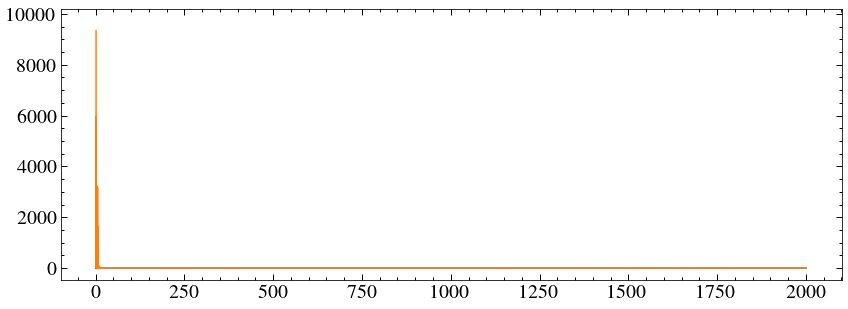

In [8]:
plt.plot(w, el/f)
plt.plot(w, eu/f)
#plt.ylim()

In [9]:
#f = f/5

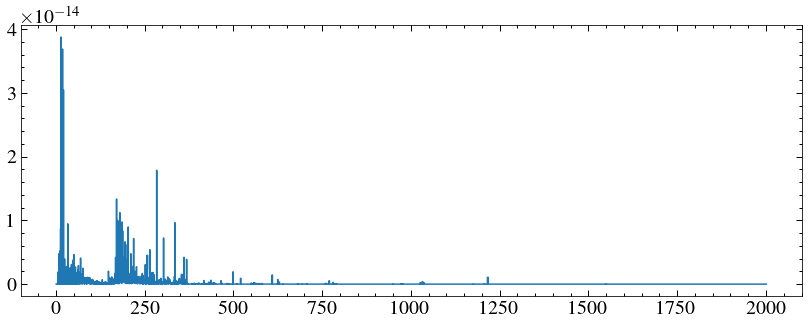

In [10]:
plt.step(w,f, where='mid')

In [11]:
ldat = Table.read('../combined/TRAPPIST-1_1Aeuv_estimate.ecsv')

In [12]:
lw, lf = ldat['WAVELENGTH'], ldat['FLUX']

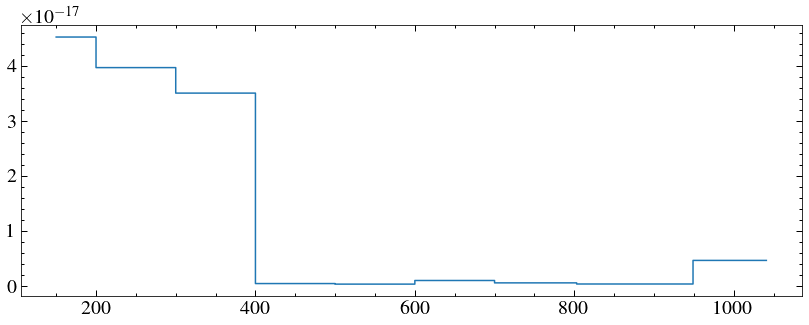

In [13]:
plt.step(lw, lf, where='mid')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


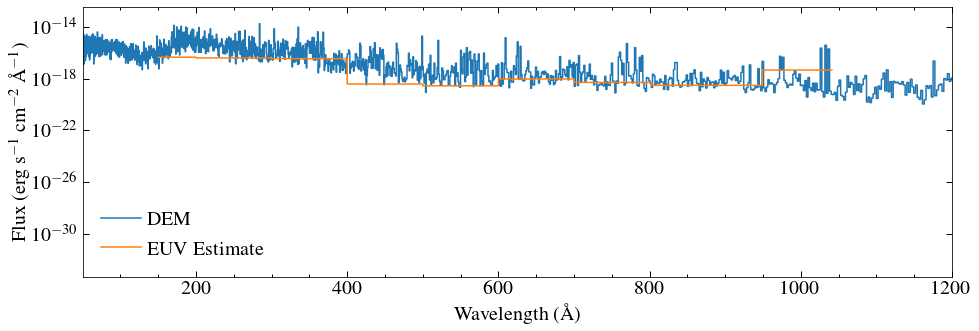

In [14]:
plt.step(w,f, where='mid', label='DEM')
plt.step(lw, lf, where='mid', label='EUV Estimate')
plt.xlim(50, 1200)
plt.yscale('log')
plt.legend()
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.tight_layout()
plt.savefig('dem_v_euv.png', dpi =150)

Comparison with Phoenix models

In [15]:
mpath = '/home/david/work/muscles/trappist-1/sp_models/'
d = 12.14*u.pc
r = 0.117*const.R_sun
scale = (r/d.to(u.m))**2
mods = os.listdir(mpath)
mods

['TRAPPIST1_2A_fullres.txt',
 'TRAPPIST1_1A_fullres.txt',
 'TRAPPIST1_2B_fullres.txt']

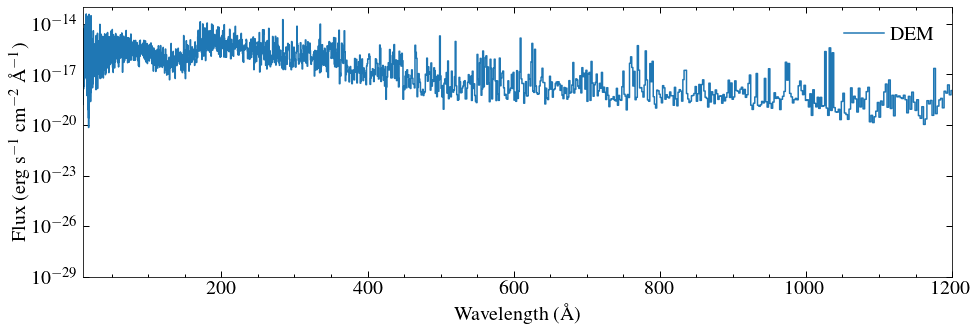

In [16]:
#for mod in mods:
   # mw, mf = np.loadtxt(mpath+mod, unpack=True, skiprows=1)
   # plt.plot(mw, mf*scale)
plt.step(w,f, where='mid', label='DEM')
mw, mf = np.loadtxt(mpath+mods[1], unpack=True, skiprows=1)
#mfi = interp1d(mw, mf, fill_value='extrapolate')(w)
#plt.step(w, mfi*scale, zorder=-1, where='mid', label = 'Peacock et al. 2019 Model 1A')
#plt.step(lw, lf, where='mid', label='EUV Estimate')
plt.xlim(10, 1200)
plt.ylim(1e-29, 1e-13)
plt.yscale('log')
plt.legend()
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.tight_layout()
#plt.savefig('dem_v_P19.png', dpi=150)

In [17]:
xmm_file = '../xmm/Trappist-1.fits'
datax = fits.getdata(xmm_file, 1)

Compare dem with EUV estimates and xmm 

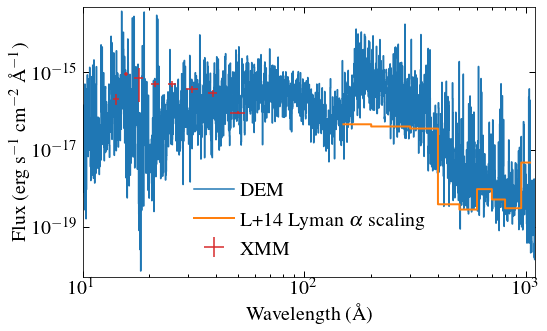

In [35]:
plt.figure(figsize=(8,5))
plt.step(w,f, where='mid', label='DEM')
#plt.errorbar(w, f, yerr=(el, eu), drawstyle='steps-mid')
plt.step(lw, lf, where='mid', label=r'L+14 Lyman $\alpha$ scaling ', lw=2)
plt.xlim(10, 1100)
plt.ylim(5e-21, 5e-14)
plt.errorbar(datax['WAVE'], datax['CFlux'], xerr=datax['BIN_WIDTH']/2, yerr = datax['CFLUX_err'], ls ='none', label ='XMM',zorder=10, c='C3')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=8)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.tight_layout()
plt.savefig('../plots/T1_dem_v_euv.pdf', dpi =150)

In [19]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3805 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'Wavelength'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'Flux_density'                                                        
TFORM2  = 'D       '        

In [20]:
old=fits.getdata('old_t1_dem.fits',1)

In [21]:
old.names

['Wavelength', 'Flux_Density', 'Lower_Error_16', 'Upper_Error_84']

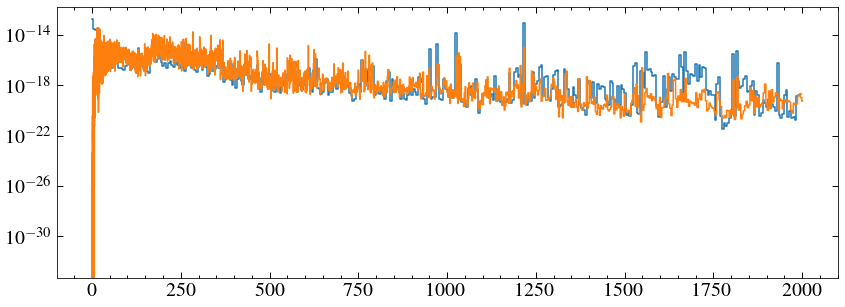

In [22]:
plt.step(old['Wavelength'], old['Flux_Density'], where='mid')
plt.yscale('log')
plt.step(w,f, where='mid', label='DEM')


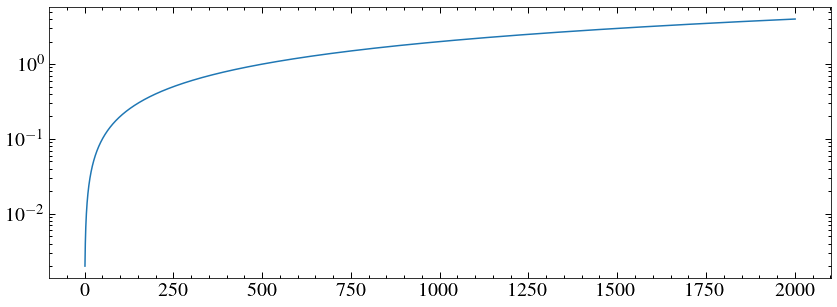

In [33]:
plt.plot(w[1:], np.diff(w))
plt.yscale('log')